In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

street = pd.read_parquet("processed_data/street.parquet")
search = pd.read_parquet("processed_data/search.parquet")
outcomes = pd.read_parquet("processed_data/outcomes.parquet")

### EDA on Street 

In [3]:
street

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
0,None,City of London Police,City of London Police,-0.093948,51.518078,On or near Monkwell Square,E01000002,NaN,2010,12
1,None,City of London Police,City of London Police,-0.095860,51.521660,On or near Fann Street,E01000003,NaN,2010,12
2,None,City of London Police,City of London Police,-0.092719,51.512653,On or near Queen Victoria Street,E01032739,NaN,2010,12
3,None,City of London Police,City of London Police,-0.088203,51.518261,On or near Moorgate,E01032739,NaN,2010,12
4,None,City of London Police,City of London Police,-0.086724,51.517445,On or near Finsbury Circus,E01032739,NaN,2010,12
...,...,...,...,...,...,...,...,...,...,...
1026270,8bd05b8ec4487edc170e0eff718bce22522502be250a17...,Metropolitan Police Service,Metropolitan Police Service,-0.149923,51.485870,On or near A3212,E01033597,Investigation complete; no suspect identified,2025,2
1026271,b9e167bf393608f58352f1026376bdf35e749de7a177bf...,Metropolitan Police Service,Metropolitan Police Service,-0.150502,51.486519,On or near Hospital,E01033597,Investigation complete; no suspect identified,2025,2
1026272,594ff4f525ed84d29b3d6b8ed92a314d3b02de16d4fc1a...,Metropolitan Police Service,Metropolitan Police Service,-0.149923,51.485870,On or near A3212,E01033597,Under investigation,2025,2
1026273,ad8f08259459c4289073864275476555baec0d1a0ebe36...,Metropolitan Police Service,Metropolitan Police Service,-0.146684,51.487968,On or near Peabody Avenue,E01033599,Investigation complete; no suspect identified,2025,2


#### Distribution of Values

##### Crime ID - Missing Values

In [4]:
no_missing_rows = len(street[street['Crime ID'].isna()])
initial_rows = len(street)
official_rows = initial_rows-no_missing_rows

print(initial_rows, 'total number initial rows')
print(no_missing_rows, 'number rows that have CrimeID missing (unidentifiable)')
print(no_missing_rows/initial_rows*100, '% percentage of rows that are missing CrimeID')

print(official_rows, 'number of rows that contain CrimeID')
print()

1026275 total number initial rows
95383 number rows that have CrimeID missing (unidentifiable)
9.294097585929698 % percentage of rows that are missing CrimeID
930892 number of rows that contain CrimeID



##### Reported By

In [5]:
street[street['Reported by'].isna() == True]

# All crimes have a value in Reported By

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month


In [6]:
street['Reported by'].unique()

['City of London Police', 'Metropolitan Police Service', 'Surrey Police']
Categories (3, object): ['City of London Police', 'Metropolitan Police Service', 'Surrey Police']

In [7]:
street[street['Reported by'] == 'Surrey Police']

#This looks okay, because the 'Falls Within' column has the relevant police force       

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month
404602,8087db672b2f26b8e8d8c8ee1bc1fdb59257b662c94eee...,Surrey Police,City of London Police,-0.097334,51.521568,On or near Fann Street,E01000001,Investigation complete; no suspect identified,2015,8
404603,24dcea4f38819a458c90cbf5c4c87a69638bad2b01e382...,Surrey Police,City of London Police,-0.078806,51.516193,On or near Devonshire Square,E01000005,Investigation complete; no suspect identified,2015,8
404604,9af98a31210b7918d1bc55adfb19cf59d28aed05eaa598...,Surrey Police,City of London Police,-0.079011,51.509613,On or near Pedestrian Subway,E01032739,Suspect charged as part of another case,2015,8
404605,05a7a19c1de515378a5bf5ca5e82583b3a17b050451568...,Surrey Police,City of London Police,-0.085014,51.509773,On or near Monument Street,E01032739,Investigation complete; no suspect identified,2015,8
404606,d0f47c3842129eeb42eaad21a4db491512ebed20a5c288...,Surrey Police,City of London Police,-0.092865,51.510181,On or near Parking Area,E01032739,Investigation complete; no suspect identified,2015,8
404607,7b6ca8dac25bf433efbd85f872423fdc388fe3aa8f4eeb...,Surrey Police,City of London Police,-0.080665,51.509342,On or near Pedestrian Subway,E01032739,Investigation complete; no suspect identified,2015,8
404608,e61a236029a99373d53ca37be7b2c5eb4329cd4177b1d9...,Surrey Police,City of London Police,-0.098777,51.512527,On or near Knightrider Street,E01032739,Awaiting court outcome,2015,8
404609,958de8b79f00d5157bb1116e9d7dbb2681387bdd0073d4...,Surrey Police,City of London Police,-0.077578,51.510796,On or near Pepys Street,E01032739,Investigation complete; no suspect identified,2015,8
404610,07b4035b57b095ce3e0c53b988423e8d28c6df5ff560ab...,Surrey Police,City of London Police,-0.100202,51.513268,On or near Dean'S Court,E01032739,Investigation complete; no suspect identified,2015,8
404611,8ca7ac6234c9d940c1a0c9b1533b0f1f9cbe35344091a5...,Surrey Police,City of London Police,-0.077578,51.510796,On or near Pepys Street,E01032739,Offender sent to prison,2015,8


Reported by
Metropolitan Police Service    1022291
City of London Police             3972
Surrey Police                       12
Name: count, dtype: int64


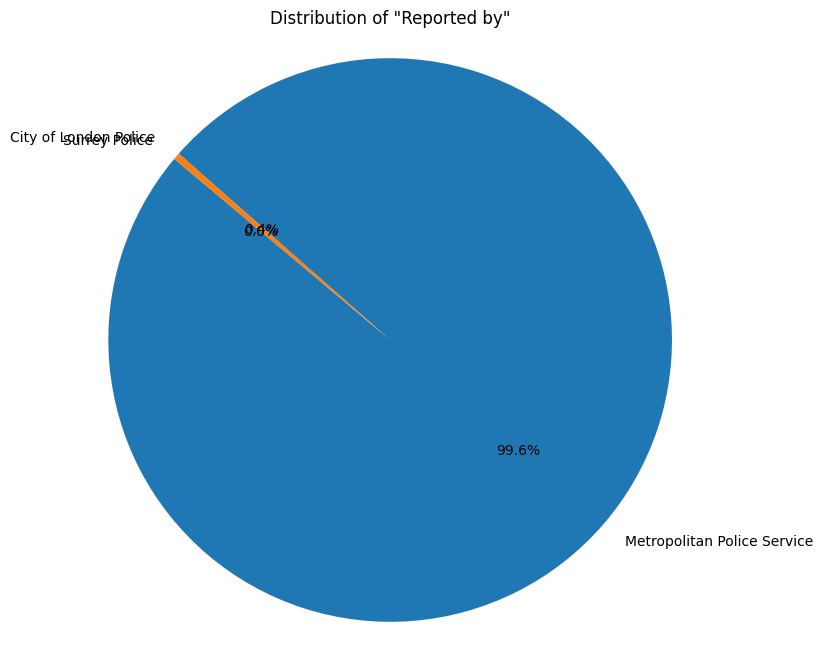

In [8]:
report_counts = street['Reported by'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Reported by"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### Falls Within

In [9]:
street[street['Falls within'].isna() == True]

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,year,month


In [10]:
street['Falls within'].unique()

#Correct!

['City of London Police', 'Metropolitan Police Service']
Categories (2, object): ['City of London Police', 'Metropolitan Police Service']

Falls within
Metropolitan Police Service    1022291
City of London Police             3984
Name: count, dtype: int64


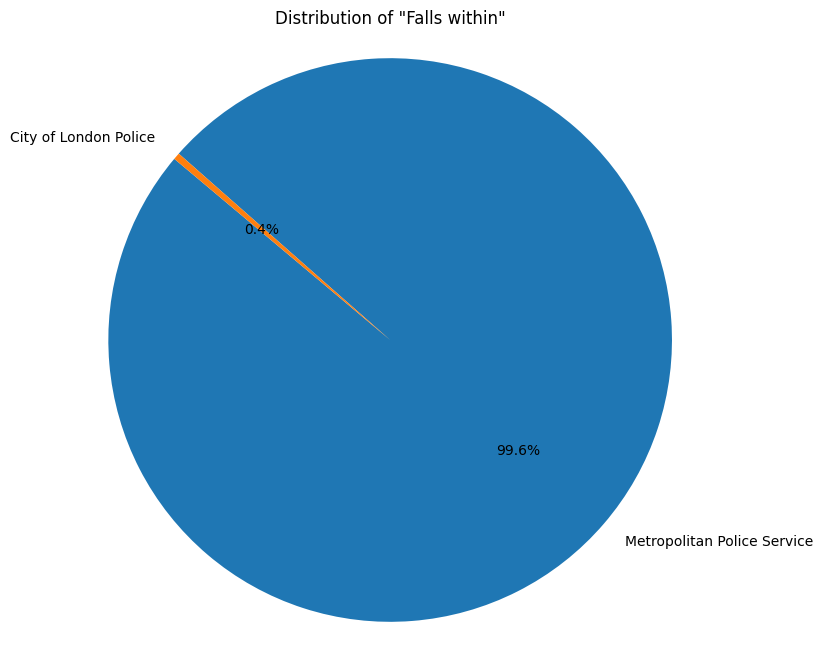

In [11]:
report_counts = street['Falls within'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### LSOA Code

##### Function for LSOA -> Ward & Borough

In [24]:
# Load the lookup CSV (adjust path if needed)
lookup_df = pd.read_csv("processed_data/LSOA_to_Ward_LAD_lookup.csv")

def get_ward_and_borough(lsoa_code):
    """
    Given an LSOA code (2021), return the corresponding (ward, borough).
    """
    row = lookup_df[lookup_df['LSOA21CD'] == lsoa_code]

    if not row.empty:
        ward = row.iloc[0]['WD24NM']
        borough = row.iloc[0]['LAD24NM']
        return ward, borough
    else:
        return None, None

# Example usage:
lsoa_example = "E01000001"  # Replace with a real code from your data
ward, borough = get_ward_and_borough(lsoa_example)
print(f"LSOA: {lsoa_example}\nWard: {ward}\nBorough: {borough}")


LSOA: E01000001
Ward: Aldersgate
Borough: City of London


LAD24NM
Barnet                    47221
Westminster               42513
Lambeth                   40318
Enfield                   38958
Croydon                   37372
Southwark                 37369
Ealing                    36735
Brent                     36145
Camden                    35930
Haringey                  35692
Hackney                   34337
Lewisham                  33589
Wandsworth                33574
Bromley                   32467
Redbridge                 32404
Islington                 31042
Hillingdon                29480
Waltham Forest            29337
Tower Hamlets             28803
Newham                    28090
Hounslow                  26541
Havering                  25529
Greenwich                 25257
Harrow                    23532
Kensington and Chelsea    22728
Hammersmith and Fulham    22711
Richmond upon Thames      21756
Barking and Dagenham      20753
Merton                    19498
Bexley                    17446
Name: count, dtype: int64


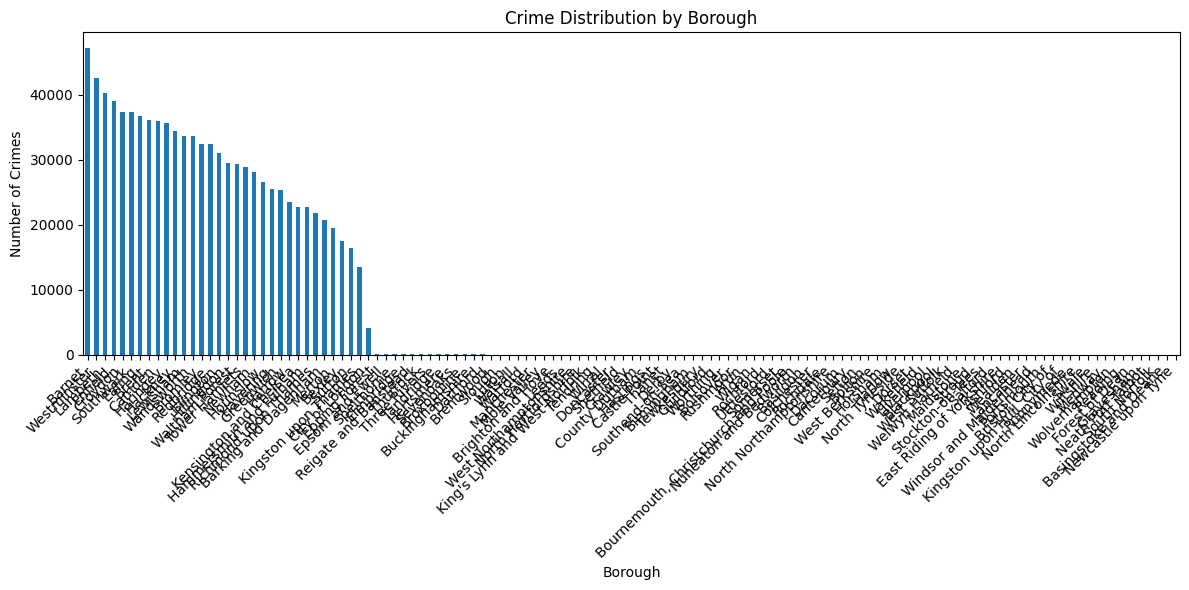

In [ ]:
# 1. Load the LSOA-to-Borough lookup
lookup = pd.read_csv("processed_data/LSOA_to_Ward_LAD_lookup.csv")  # Update filename if needed

# 2. Merge 'street' with the lookup
# Make sure both DataFrames use the same LSOA code format
street_with_borough = street.merge(
    lookup[['LSOA21CD', 'LAD24NM']], 
    left_on='LSOA code', 
    right_on='LSOA21CD', 
    how='left'
)

# 3. Group by borough and count crimes
borough_counts = street_with_borough['LAD24NM'].value_counts()
print(borough_counts.head(30))

# 4. Plot as a bar chart
plt.figure(figsize=(12, 6))
borough_counts.plot(kind='bar')
plt.title("Crime Distribution by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Last Outcome

Last outcome category
Investigation complete; no suspect identified          462785
Under investigation                                    202593
Status update unavailable                              177976
Court result unavailable                                19877
Offender sent to prison                                  9322
Unable to prosecute suspect                              7352
Awaiting court outcome                                   6633
Suspect charged as part of another case                  5922
Defendant found not guilty                               3966
Offender given suspended prison sentence                 2612
Offender given community sentence                        2361
Court case unable to proceed                             1590
Offender given a caution                                 1317
Local resolution                                          492
Offender fined                                            361
Offender given conditional discharge            

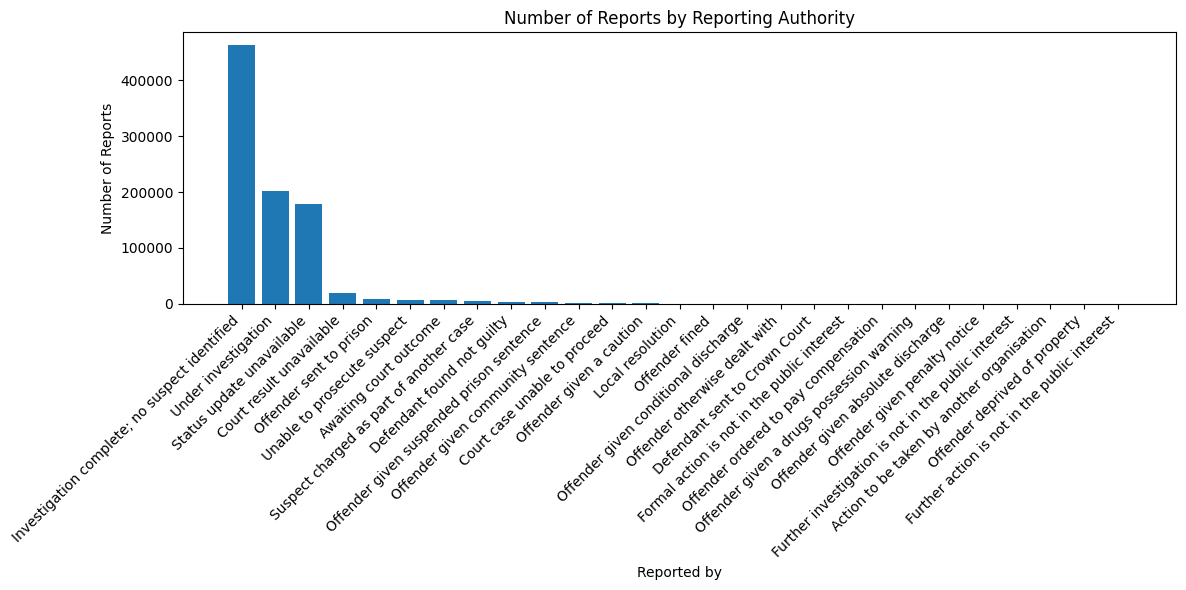

In [15]:
report_counts = street['Last outcome category'].value_counts()
print(report_counts)

plt.figure(figsize=(12, 6))  # Wider for label clarity
plt.bar(report_counts.index, report_counts.values)

# Labeling
plt.title('Number of Reports by Reporting Authority')
plt.xlabel('Reported by')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()

##### Year

year
2011    96170
2012    94998
2013    88277
2018    80948
2019    79581
2014    76504
2017    76095
2015    70796
2016    68565
2020    61245
2023    56573
2022    53926
2021    53567
2024    52885
2025     8240
2010     7905
Name: count, dtype: int64


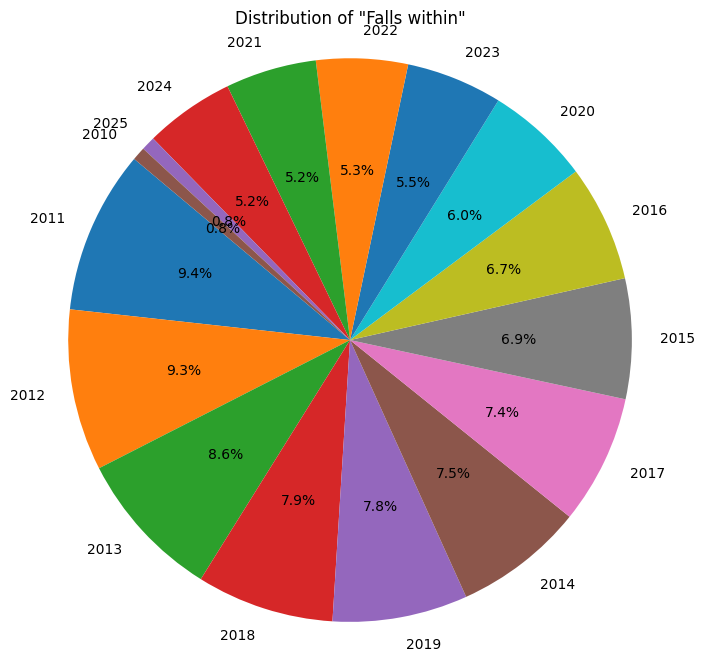

In [13]:
report_counts = street['year'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()

##### Month

month
1     99708
12    97177
11    91677
2     88776
3     87903
10    87351
8     80810
5     79438
9     78810
7     78747
4     78423
6     77455
Name: count, dtype: int64


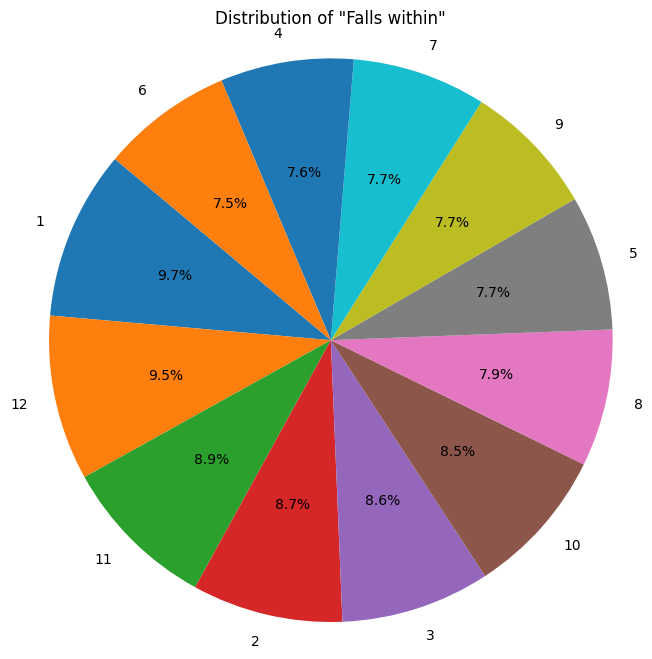

In [14]:
report_counts = street['month'].value_counts()
report_counts

plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "Falls within"')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
print(report_counts)
plt.show()